In [2]:
# !pip install gym
# !pip install pygame
import gym 
from IPython.display import clear_output,display
from time import sleep
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_path = '../Data/'

%matplotlib inline

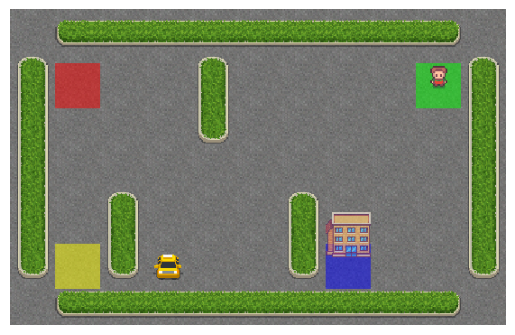

In [2]:
env = gym.make("Taxi-v3",render_mode="rgb_array").env 
env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()
# rules: https://gym.openai.com/envs/Taxi-v3/

In [3]:
# random agent driving 
state = env.reset()[0]
done = False

for t in range(100):
    
    # random action
    action = env.action_space.sample() 
    
    # get new state and reward
    newstate, reward, done, _, _ = env.step(action) 
    
    # output
    clear_output(wait=True)
    frame = env.render()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    print('Experience:')
    print('state : %d' % state)
    print('action: %d' % action)
    print('reward: %d' % reward)
    print('next state: %d' % newstate)
    sleep(1)
    
    state = newstate

KeyboardInterrupt: 

In [4]:
env = gym.make("Taxi-v3",render_mode="rgb_array").env 

Q = np.zeros((env.observation_space.n,env.action_space.n))

epsilon = 0.1
gamma = 0.9
alpha = 0.1

for episode in range(50000):

    if (episode+1) % 500 == 0:
        print('episode %d' % (episode+1))
    
    state , done = env.reset()[0], False

    while not done:

        if np.random.uniform() < epsilon:
        
            action = env.action_space.sample()
        
        else:
            
            action = np.argmax(Q[state])
        
        
        # get new state and reward
        newstate, reward, done, _, _ = env.step(action) 

        # update
        y = reward + gamma * np.max(Q[newstate])
    
        Q[state,action] = Q[state,action] + alpha * (y - Q[state,action])

        state = newstate

episode 500
episode 1000
episode 1500
episode 2000
episode 2500
episode 3000
episode 3500
episode 4000
episode 4500
episode 5000
episode 5500
episode 6000
episode 6500
episode 7000
episode 7500
episode 8000
episode 8500
episode 9000
episode 9500
episode 10000
episode 10500
episode 11000
episode 11500
episode 12000
episode 12500
episode 13000
episode 13500
episode 14000
episode 14500
episode 15000
episode 15500
episode 16000
episode 16500
episode 17000
episode 17500
episode 18000
episode 18500
episode 19000
episode 19500
episode 20000
episode 20500
episode 21000
episode 21500
episode 22000
episode 22500
episode 23000
episode 23500
episode 24000
episode 24500
episode 25000
episode 25500
episode 26000
episode 26500
episode 27000
episode 27500
episode 28000
episode 28500
episode 29000
episode 29500
episode 30000
episode 30500
episode 31000
episode 31500
episode 32000
episode 32500
episode 33000
episode 33500
episode 34000
episode 34500
episode 35000
episode 35500
episode 36000
episode 3650

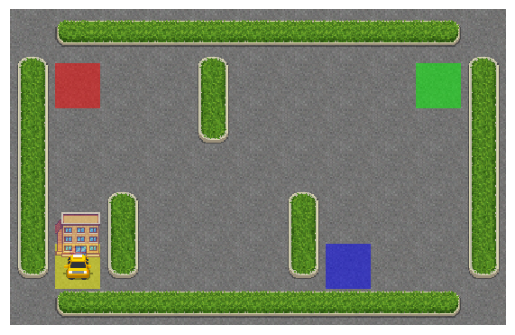

In [5]:
# trained agent driving

state , done = env.reset(seed=600)[0], False
while not done:    
    
    # optimal action
    action = np.argmax(Q[state])
    
    # get new state and reward
    state, reward, done, _, _ = env.step(action)
    
    clear_output(wait=True)
    frame = env.render()
    plt.imshow(frame)
    plt.axis("off")
    plt.show()
    sleep(.5)

# Portfolio problem

In [13]:
import random
df = pd.read_csv('../Data/mkt_rf_dp.csv')
df.head(25)

,yyyymm,Ret,Rfree,D/P
0,187102,0.013514,0.004525,-2.851151
1,187103,0.024444,0.004252,-2.875302
2,187104,0.028200,0.004643,-2.903111
3,187105,0.025316,0.003698,-2.928112
4,187106,-0.008230,0.003373,-2.919848
5,187107,-0.018672,0.003255,-2.900999
6,187108,0.012685,0.003713,-2.913604
7,187109,0.010438,0.004554,-2.923988
8,187110,-0.051653,0.007041,-2.870954
9,187111,0.010893,0.006488,-2.881788


In [14]:
df['DP_lag'] = df['D/P'].shift(12)
df.head(15)

,yyyymm,Ret,Rfree,D/P,DP_lag
0,187102,0.013514,0.004525,-2.851151,NaN
1,187103,0.024444,0.004252,-2.875302,NaN
2,187104,0.028200,0.004643,-2.903111,NaN
3,187105,0.025316,0.003698,-2.928112,NaN
4,187106,-0.008230,0.003373,-2.919848,NaN
5,187107,-0.018672,0.003255,-2.900999,NaN
6,187108,0.012685,0.003713,-2.913604,NaN
7,187109,0.010438,0.004554,-2.923988,NaN
8,187110,-0.051653,0.007041,-2.870954,NaN
9,187111,0.010893,0.006488,-2.881788,NaN


In [15]:
df = df.dropna()
df.head()

,yyyymm,Ret,Rfree,D/P,DP_lag
12,187202,0.004115,0.005218,-2.906776,-2.851151
13,187203,0.032787,0.006001,-2.926739,-2.875302
14,187204,0.027778,0.006030,-2.941990,-2.903111
15,187205,0.000000,0.004953,-2.929626,-2.928112
16,187206,-0.009653,0.004067,-2.908071,-2.919848


In [17]:
# cut the dividend price ratio into 5 buckets 
# 0 -> low d/p ratio 
# 5 -> high d/p ratio 
df['signal'] = pd.qcut(df['DP_lag'],5,labels=False)
df.head()

,yyyymm,Ret,Rfree,D/P,DP_lag,signal
12,187202,0.004115,0.005218,-2.906776,-2.851151,4
13,187203,0.032787,0.006001,-2.926739,-2.875302,4
14,187204,0.027778,0.006030,-2.941990,-2.903111,3
15,187205,0.000000,0.004953,-2.929626,-2.928112,3
16,187206,-0.009653,0.004067,-2.908071,-2.919848,3


<Axes: xlabel='signal'>

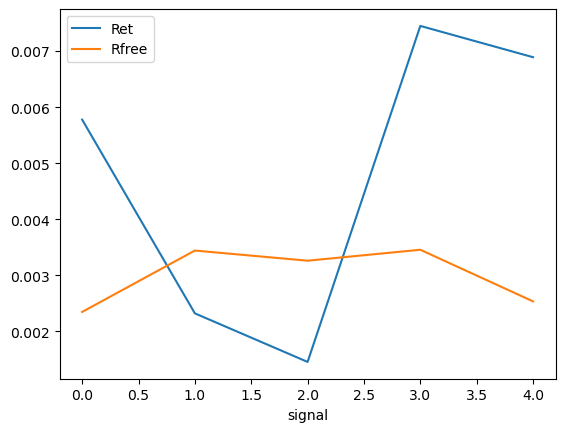

In [18]:
df.groupby('signal').mean()[['Ret','Rfree']].plot()

episode 500000

<Figure size 640x480 with 0 Axes>

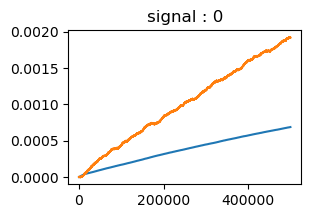

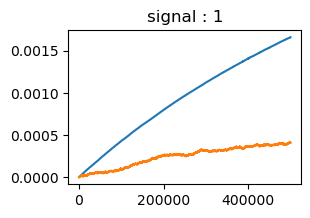

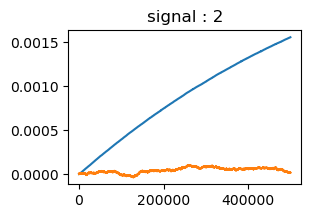

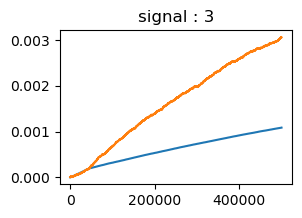

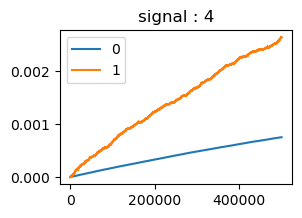

In [51]:
# Q learning discrete choice -- not using signal yet
Q = np.zeros((5,2))
Q_mem = []

n_ep = 500000

alpha = 1e-5
epsilon = 0.7

for ep in range(n_ep):
    
    if (ep+1) % 500 == 0:
        print('\repisode %d' % (ep+1), end='')
        
    # draw a random "birth" time
    t = random.choice(df.index[0:-12])
    
    # agent will invest for a year 
    for step in range(1):
    
        # look up the signal 
        signal = df['signal'].loc[t]

        # choose action using epsilon greedy
        if np.random.uniform() < epsilon:
            action = random.choice([0,1])
        else:
            # choose action based on the Q in the signal row  
            action = np.argmax(Q[signal]) # make this depend on the signal 

        # get reward
        if action == 1:
            r = np.log(1+df['Ret'].loc[t]) 
        else:
            r = np.log(1+df['Rfree'].loc[t])
        
        # set target
        y = r
        
        # Q update 
        # only update the signal and action that we chose 
        Q[signal, action] +=  alpha * (y - Q[signal, action])
        
        # store Q table in memory for plots
        Q_mem.append(Q.copy())
        
        # move date
        t += 1
    
plt.figure()
for signal in [0,1,2,3,4]:
    plt.figure(figsize=(3,2))
    plt.title('signal : ' + str(signal))
    for action in [0,1]: 
        Q_hist = [x[signal, action] for x in Q_mem]
        plt.plot(Q_hist)
plt.legend([0,1])

In [9]:

df[['Ret','Rfree']].mean()

Ret      0.004779
Rfree    0.003009
dtype: float64

Data of return is super noisy. When you take a step and you see a noisy return of the stock market, so the agent makes a noisy decision based on the noisy return data. 